# **Food Beverage Industry Analysis Report**

### **รายชื่อสมาชิก**
 ##### 1. 6510405750 นายภูมิระพี เสริญวณิชกุล     sec1   
 ##### 2. 6510450194 นางสาวกานต์นิตรา สุขพานิช   sec 200
 ##### 3. 6510450674 นางสาวปุญญิศา ธัญญพงษ์    sec 200
### **เสนอ**
 ##### ผศ.ดร.เสฏฐวิทย์ เกิดผล
### **รายงานนี้เป็นส่วนหนึ่งของวิชา**
 ##### 01418322 วิทยาการข้อมูลเบื้องต้น Introduction to Data Science

## **รายงานการวิเคราะห์อุตสาหกรรมอาหารและเครื่องดื่ม**

### **แหล่งที่มา (Source)**

##### **แหล่งที่มา** :  website [Kaggle](https://www.kaggle.com/datasets/ad043santhoshs/food-and-beverage-industry) 
##### **ผู้จัดหาข้อมูล** : Santhosh S

### **รายละเอียดข้อมูล**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

เลือกข้อมูลจากการสำรวจพฤติกรรมการบริโภคเครื่องดื่มของผู้คนในประเทศอินเดีย ซึ่งได้ข้อมูลมาในรูปแบบของ excel

In [3]:
#นำเข้าข้อมูลจาก excel
df = pd.read_csv('Food Beverage Industry.csv')
df

,Column1,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103006,120036,Rarely,For mental alertness,To combat fatigue,Yes,Negative,Not sure,No,5,...,Yes,Above 150,Gyms and fitness centers,Social outings/parties,Zeeshan Ratta,19-30,Female,CT118,Pune,Tier 2
3,103007,120037,2-3 times a month,To stay awake during work/study,Increased energy and focus,No,Positive,Not sure,No,4,...,Yes,100-150,Other,Sports/exercise,Oorja Anne,19-30,Male,CT112,Mumbai,Tier 1
4,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,112996,130026,Daily,Before exercise,To enhance sports performance,Yes,Neutral,Not sure,No,4,...,Yes,100-150,Supermarkets,Studying/working late,Arnav Kale,31-45,Male,CT112,Mumbai,Tier 1
9996,112997,130027,Daily,To stay awake during work/study,To combat fatigue,No,Positive,Healthy,Yes,2,...,Yes,50-99,Online retailers,Social outings/parties,Yuvraj Agrawal,15-18,Male,CT113,Bangalore,Tier 1
9997,112998,130028,Daily,Before exercise,Increased energy and focus,Yes,Positive,Effective,No,2,...,No,100-150,Other,Sports/exercise,Vardaniya Chauhan,31-45,Male,CT114,Chennai,Tier 1
9998,112999,130029,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,No,4,...,Not Sure,50-99,Supermarkets,Studying/working late,Jayan Goyal,19-30,Male,CT113,Bangalore,Tier 1


##### ชุดข้อมูลนี้เป็นชุดข้อมูลเกี่ยวกับพฤติกรรมการบริโภคเครื่องดื่มของผู้คนในประเทศอินเดีย โดยประกอบด้วยคำตอบจากการสำรวจทั้งหมด 10000 ตัวอย่าง และมีทั้งหมด 29 คอลัมน์

#### **Meta Data** ของชุดข้อมูลที่ได้จากการสำรวจ

##### **ข้อมูลทั่วไป** 
- `Consume_frequency`: ความถี่ในการบริโภคสินค้า (Times, Daily, Once a week, Rarely)
- `Consume_time`: เวลาที่ทำการบริโภค (ช่วงเวลา)
- `Consume_reason`: เหตุผลที่เลือกบริโภค (ความต้องการ)

##### **ข้อมูลเกี่ยวกับแบรนด์** 
- `Current_brands`: แบรนด์ที่ใช้ในปัจจุบัน
- `Reasons_for_choosing_brands`: เหตุผลที่เลือกบริโภคแบรนด์ดังกล่าว (ความคิดเห็น) 
- `Heard_before`: การทราบข้อมูลหรือได้ยินเกี่ยวกับสินค้าหรือบริการก่อนหน้า (Yes, No)
- `Brand_perception`: มุมมองหรือความรู้สึกต่อแบรนด์ (Positive, Negative, Neutral)
- `General_perception`: มุมมองหรือความรู้สึกทั่วไป (ความรู้สึก)

##### **ข้อมูลเกี่ยวกับผลิตภัณฑ์** 
- `Taste_experience`: การให้คะแนนที่ได้จากการลองใช้ (1-5)
- `Reasons_preventing_trying`: เหตุผลที่ขัดขวางการลองใช้ 
- `Tried_before`: ลองใช้สินค้าหรือบริการก่อนหน้า (Yes, No)
- `Improvements_desired`: การปรับปรุงที่ต้องการ 
- `Ingredients_expected`: ส่วนประกอบที่คาดหวัง 
- `Health_concerns`: ความกังวลในเรื่องสุขภาพ 
- `Interest_in_natural_or_organic`: ความสนใจในสินค้าธรรมชาติหรืออินทรีย์

##### **ข้อมูลเกี่ยวกับการตลาด** 
- `Marketing_channels`: ช่องทางการตลาดที่ใช้ 
- `Packaging_preference`: ลักษณะ packaging ที่ชอบ
- `Limited_edition_packaging`: จะเลือกซื้อมั้ยถ้าเป็น packaging แบบ limited
##### **ข้อมูลเกี่ยวกับการซื้อ** 
- `Price_range`: ช่วงราคาที่ยอมจ่าย 
- `Purchase_location`: สถานที่ที่ซื้อ 
- `Typical_consumption_situations`: สถานการณ์ที่ทำให้กิน 
##### **ข้อมูลส่วนตัว** 
- `Name`: ชื่อของบุคคล
- `Age`: อายุของบุคคล 
- `Gender`: เพศของบุคคล 
- `City`: ชื่อเมือง 

### **การเตรียมข้อมูล**

In [4]:
df.head(5)

,Column1,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103006,120036,Rarely,For mental alertness,To combat fatigue,Yes,Negative,Not sure,No,5,...,Yes,Above 150,Gyms and fitness centers,Social outings/parties,Zeeshan Ratta,19-30,Female,CT118,Pune,Tier 2
3,103007,120037,2-3 times a month,To stay awake during work/study,Increased energy and focus,No,Positive,Not sure,No,4,...,Yes,100-150,Other,Sports/exercise,Oorja Anne,19-30,Male,CT112,Mumbai,Tier 1
4,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1


In [5]:
#การตรวจสอบข้อมูลเพื่อหา missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Column1                         10000 non-null  int64 
 1   Respondent_ID                   10000 non-null  int64 
 2   Consume_frequency               10000 non-null  object
 3   Consume_time                    10000 non-null  object
 4   Consume_reason                  10000 non-null  object
 5   Heard_before                    10000 non-null  object
 6   Brand_perception                10000 non-null  object
 7   General_perception              10000 non-null  object
 8   Tried_before                    10000 non-null  object
 9   Taste_experience                10000 non-null  int64 
 10  Reasons_preventing_trying       10000 non-null  object
 11  Current_brands                  10000 non-null  object
 12  Reasons_for_choosing_brands     10000 non-null 

จากการสำรวจไม่พบ Missing Data และพบว่ามี 4 คอลัมน์ที่ไม่เกี่ยวข้องต่อการวิเคราะห์ข้อมูล นั่นคือ Column1(ลำดับคอลัมน์), Respondent_ID (ID ของผู้ตอบแบบสอบถาม), City_ID (รหัสประเทศ), Tier (ระดับอาหาร)

#### **การทำความสะอาดข้อมูล**

ลบคอลัมน์ที่ไม่เกี่ยวข้องต่อการวิเคราะห์ข้อมูล นั่นคือ Column1(ลำดับคอลัมน์), Respondent_ID (ID ของผู้ตอบแบบสอบถาม), City_ID (รหัสประเทศ), Tier (ระดับอาหาร)

In [6]:
df = df.drop(['Column1', 'Respondent_ID', 'City_ID', 'Tier'], axis=1)
df.head(1)

,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,...,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City
0,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,...,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,Ahmedabad


### **การวิเคราะห์ข้อมูลเชิงสำรวจเบื้องต้น**

In [7]:
df.head(5)

,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,...,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City
0,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,...,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,Ahmedabad
1,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,...,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,Pune
2,Rarely,For mental alertness,To combat fatigue,Yes,Negative,Not sure,No,5,Health concerns,Cola-Coka,...,TV commercials,Other,Yes,Above 150,Gyms and fitness centers,Social outings/parties,Zeeshan Ratta,19-30,Female,Pune
3,2-3 times a month,To stay awake during work/study,Increased energy and focus,No,Positive,Not sure,No,4,Health concerns,Cola-Coka,...,Online ads,Innovative bottle design,Yes,100-150,Other,Sports/exercise,Oorja Anne,19-30,Male,Mumbai
4,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,...,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,Hyderabad


#### **Visualize Data**

##### **กราฟแสดงช่วงอายุของผู้คนที่ได้จากการสำรวจข้อมูลโดยรวม**

In [8]:
# แสดงตารางจำนวนอายุของู้คนที่ได้จากการสำรวจข้อมูล
age = df[['Age']].groupby(['Age']).size().to_frame(name='Total').reset_index()
age

,Age,Total
0,15-18,1488
1,19-30,5520
2,31-45,2376
3,46-65,426
4,65+,190


<Axes: xlabel='Age', ylabel='Total'>

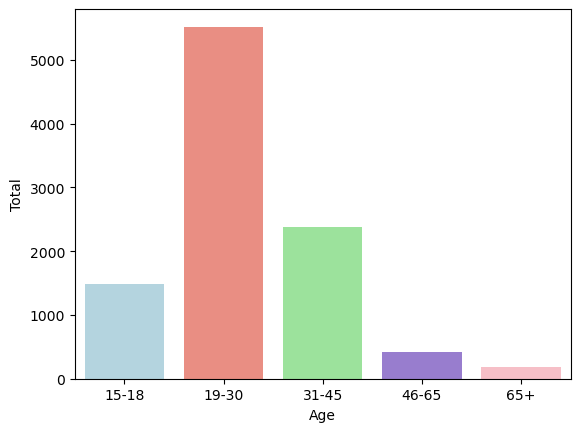

In [9]:
sns.barplot(x='Age', y='Total',palette= ['lightblue','salmon','lightgreen','mediumpurple','lightpink'], data=age)

จากกราฟพบว่าผู้คนที่ได้มาจากสำรวจมากที่สุดอยู่ในช่วงอายุ 19-30 ปีหรือทั้งหมด 5520 คนและผู้คนที่ได้มาจากสำรวจน้อยที่สุดอยู่ในช่วงอายุ 65 ปีขึ้นไปหรือทั้งหมด 190 คน

##### **กราฟแสดงเพศของผู้คนที่ได้จากการสำรวจข้อมูล**

In [10]:
# แสดงตารางจำนวนเพศของผู้คนที่ได้จากการสำรวจข้อมูล
gender = df[['Gender']].groupby(['Gender']).size().to_frame(name='Total').reset_index()
gender

,Gender,Total
0,Female,3455
1,Male,6038
2,Non-binary,507


<Axes: xlabel='Gender', ylabel='Total'>

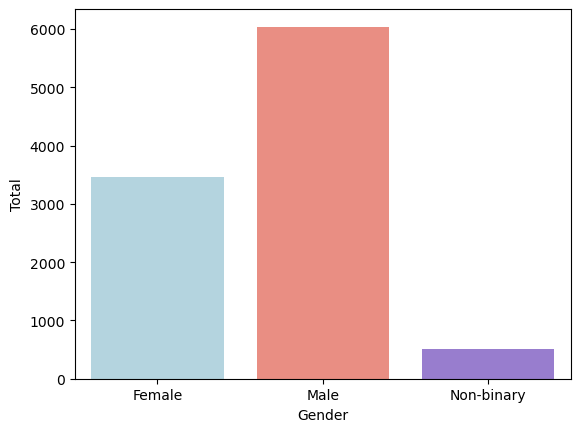

In [11]:
sns.barplot(x='Gender', y='Total',palette= ['lightblue','salmon','mediumpurple','lightpink'], data=gender)

จากการสำรวจพบว่าเพศของผู้คนที่ได้มาจากสำรวจมากที่สุดคือเพศชายซึ่งมีทั้งหมด 6038 คนและเพศของผู้คนที่ได้มาจากสำรวจน้อยที่สุดคือนอนไบนารี ซึ่งมีทั้งหมด 507 คน

##### **กราฟแสดงจำนวนการเลือกแบรนด์เครื่องดื่มตามช่วงอายุ**

In [12]:
# การสร้างตารางสรุปข้อมูลเพื่อทำการวิเคราะห์และทำการ visualize
interest_brands_age = df[['Age','Current_brands','Gender']].groupby(['Current_brands','Age']).size().to_frame(name='Total').reset_index()
interest_brands_age.head(5)

,Current_brands,Age,Total
0,Bepsi,15-18,278
1,Bepsi,19-30,1192
2,Bepsi,31-45,521
3,Bepsi,46-65,87
4,Bepsi,65+,34


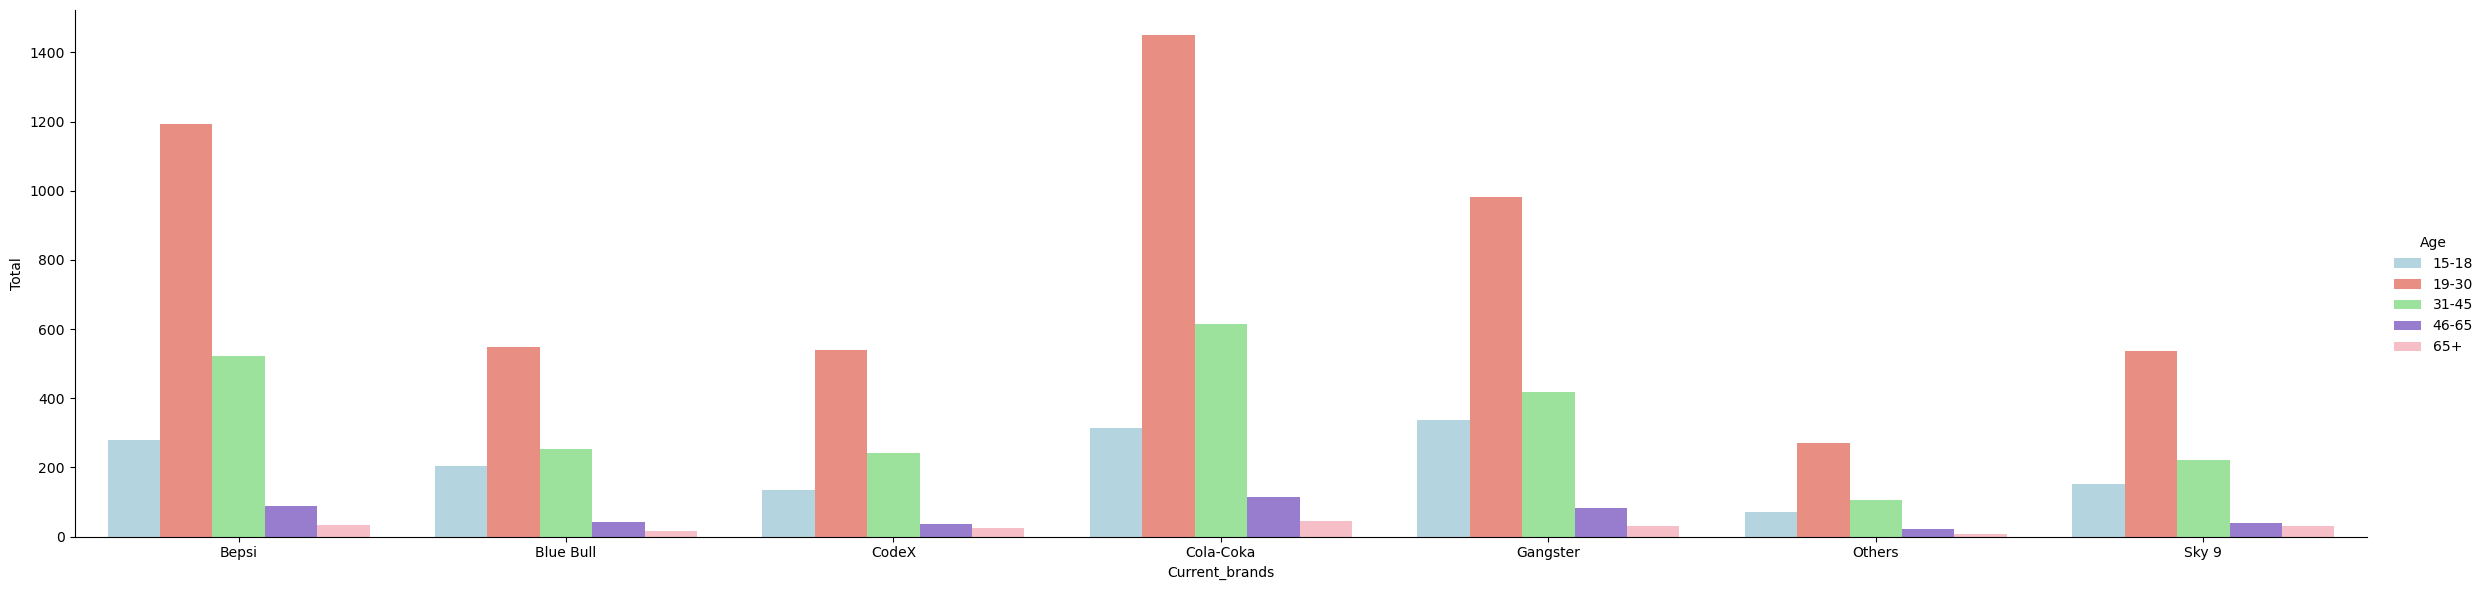

In [13]:
sns.catplot(x="Current_brands", y="Total", hue="Age", kind = 'bar', data=interest_brands_age, height=6, aspect=4 ,errorbar=None, palette= ['lightblue','salmon','lightgreen','mediumpurple','lightpink'])

จากการ visualize พบว่าในแต่ละแบรนด์มีกลุ่มลูกค้าในช่วงอายุ 19-30 ปีที่มีความสนใจเครื่องดื่มในทุกๆแบรนด์มากที่สุดและกลุ่มลูกค้าในช่วงอายุ 65 ปีขึ้นไป ที่มีความสนใจเครื่องดื่มในทุกๆแบรนด์น้อยที่สุด

##### **กราฟแสดงจำนวนการเลือกแบรนด์เครื่องดื่มตามเพศ**

In [14]:
# การสร้างตารางสรุปข้อมูลเพื่อทำการวิเคราะห์และทำการ visualize
interest_brands_gender = df[['Age','Current_brands','Gender']].groupby(['Current_brands','Gender']).size().to_frame(name='Total').reset_index()
interest_brands_gender.head(5)

,Current_brands,Gender,Total
0,Bepsi,Female,783
1,Bepsi,Male,1208
2,Bepsi,Non-binary,121
3,Blue Bull,Female,403
4,Blue Bull,Male,603


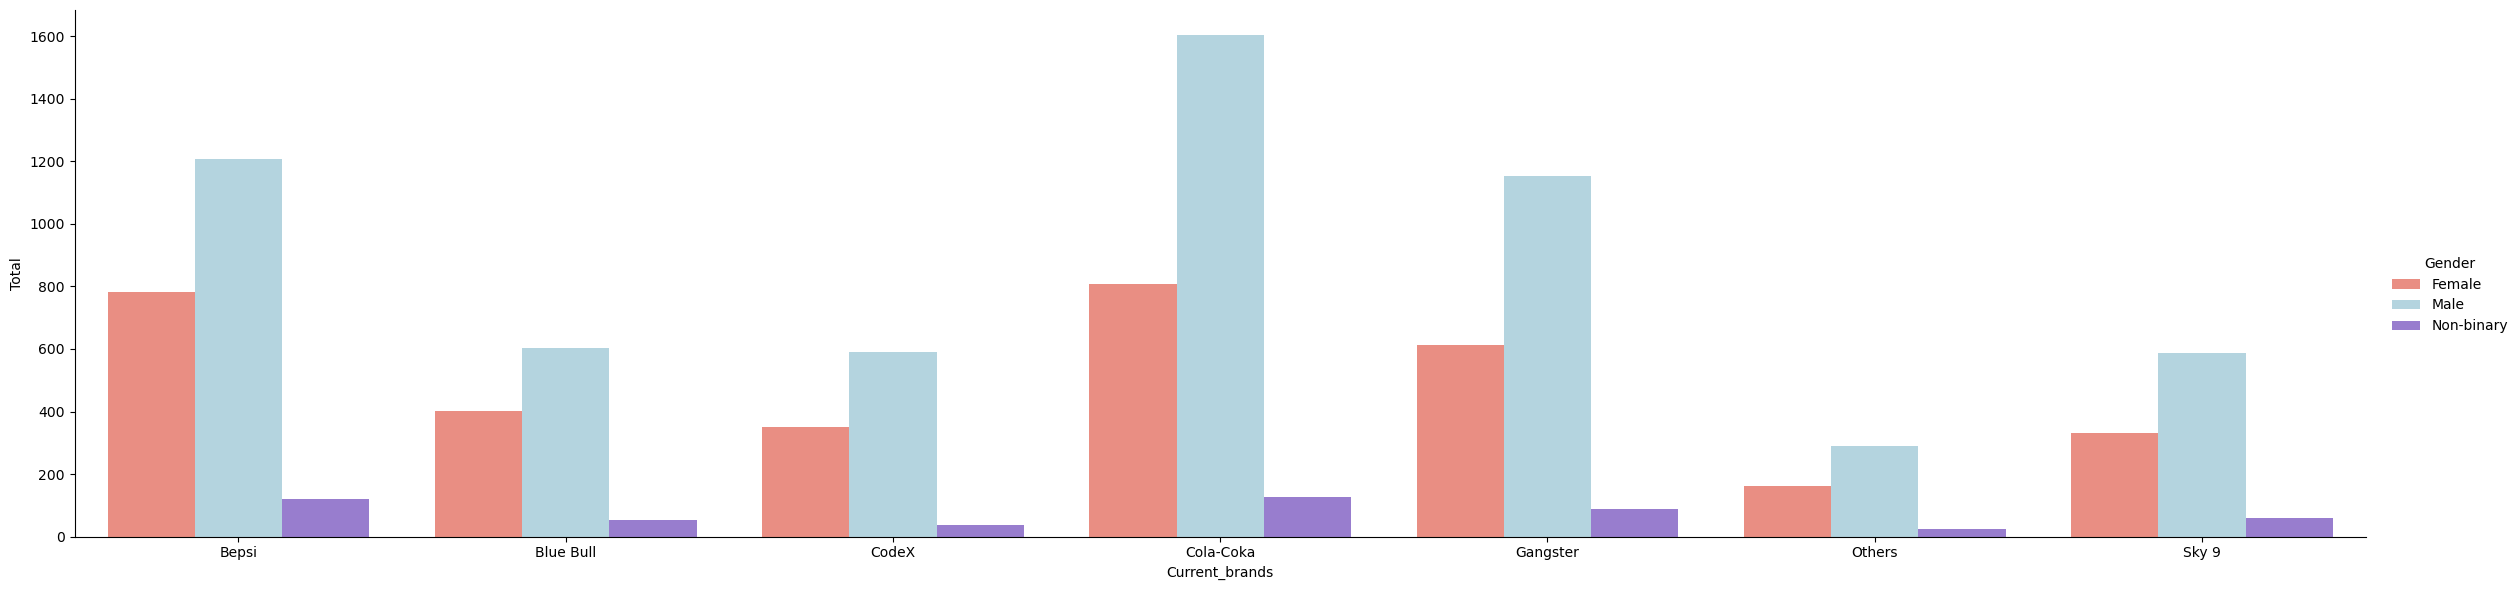

In [15]:
sns.catplot(x="Current_brands", y="Total", hue="Gender", kind='bar', data=interest_brands_gender, height=6, aspect=4 ,errorbar=None, palette= ['salmon','lightblue','mediumpurple'])

จากการทำการ visualize พบว่าในกลุ่มผู้ถูกสำรวจมีแนวโน้มที่มีความสนใจในเครื่องดื่มแต่ละแบรนด์ในทิศทางเดียวกัน โดย Cola-Coka, Bepsi และ Gangster ตามลำดับเป็น 3 แบรนด์ที่ได้รับความสนใจมากที่สุด

##### **กราฟแสดงความถี่ในการบริโภคสินค้าในแต่ละแบรนด์**

In [16]:
consume_frequency_brands = df[['Consume_frequency','Current_brands']].groupby(['Current_brands', 'Consume_frequency']).size().to_frame(name='Total').reset_index()

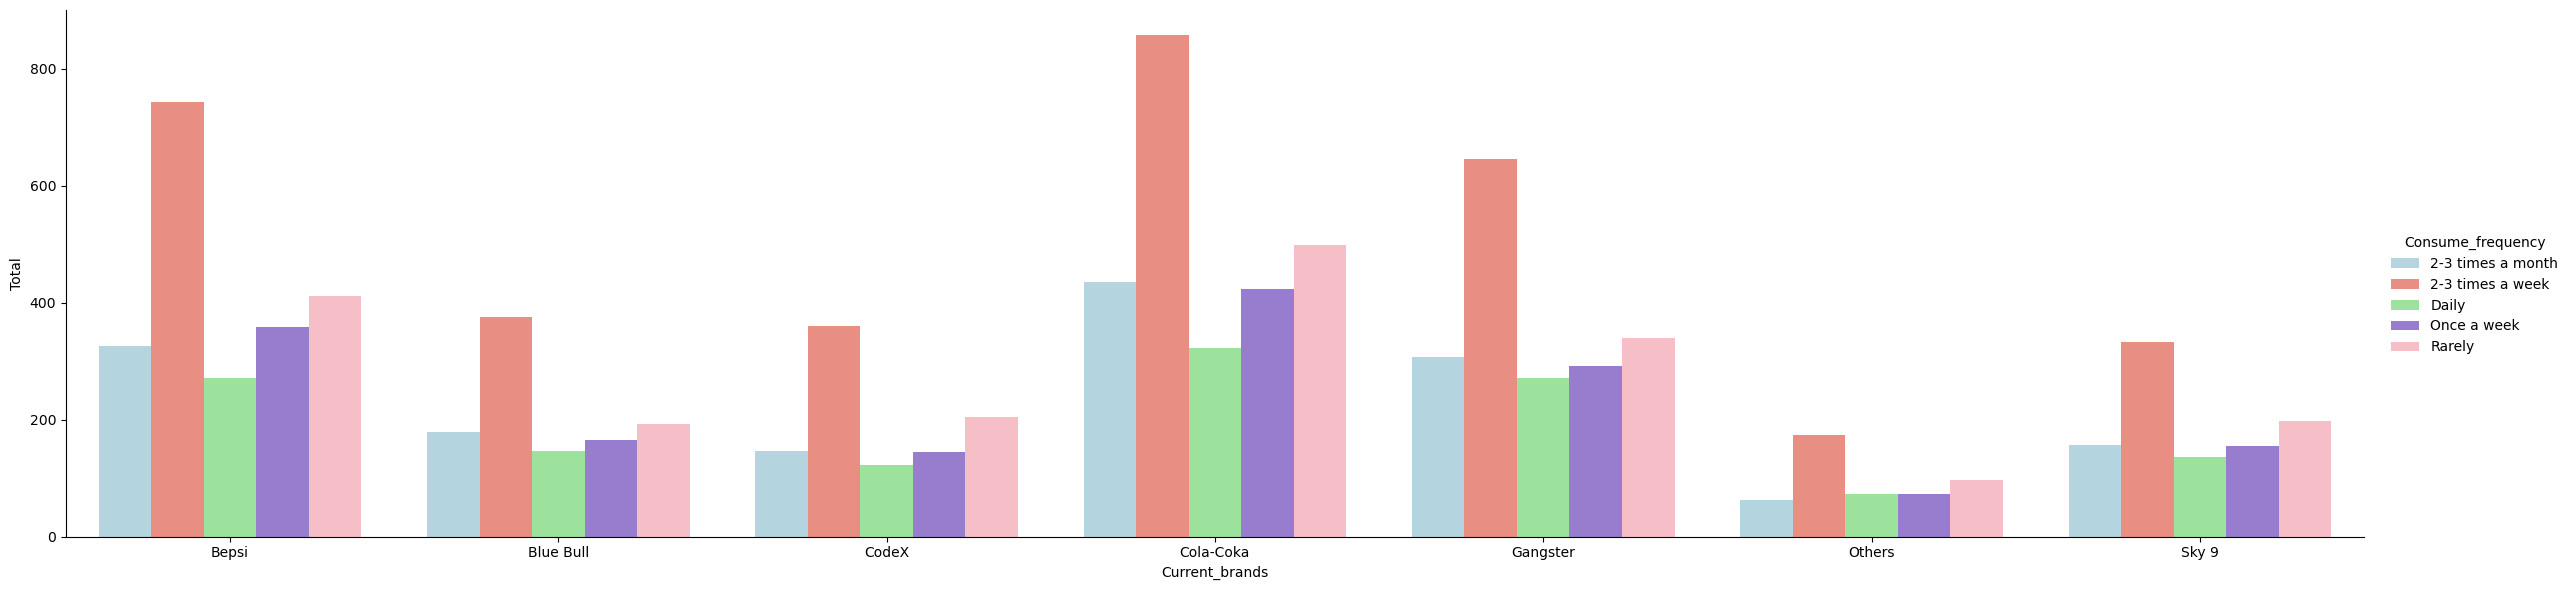

In [17]:
sns.catplot(x="Current_brands", y="Total", hue="Consume_frequency", kind='bar', data=consume_frequency_brands, height=6, aspect=4 ,errorbar=None, palette= ['lightblue','salmon','lightgreen','mediumpurple','lightpink'])

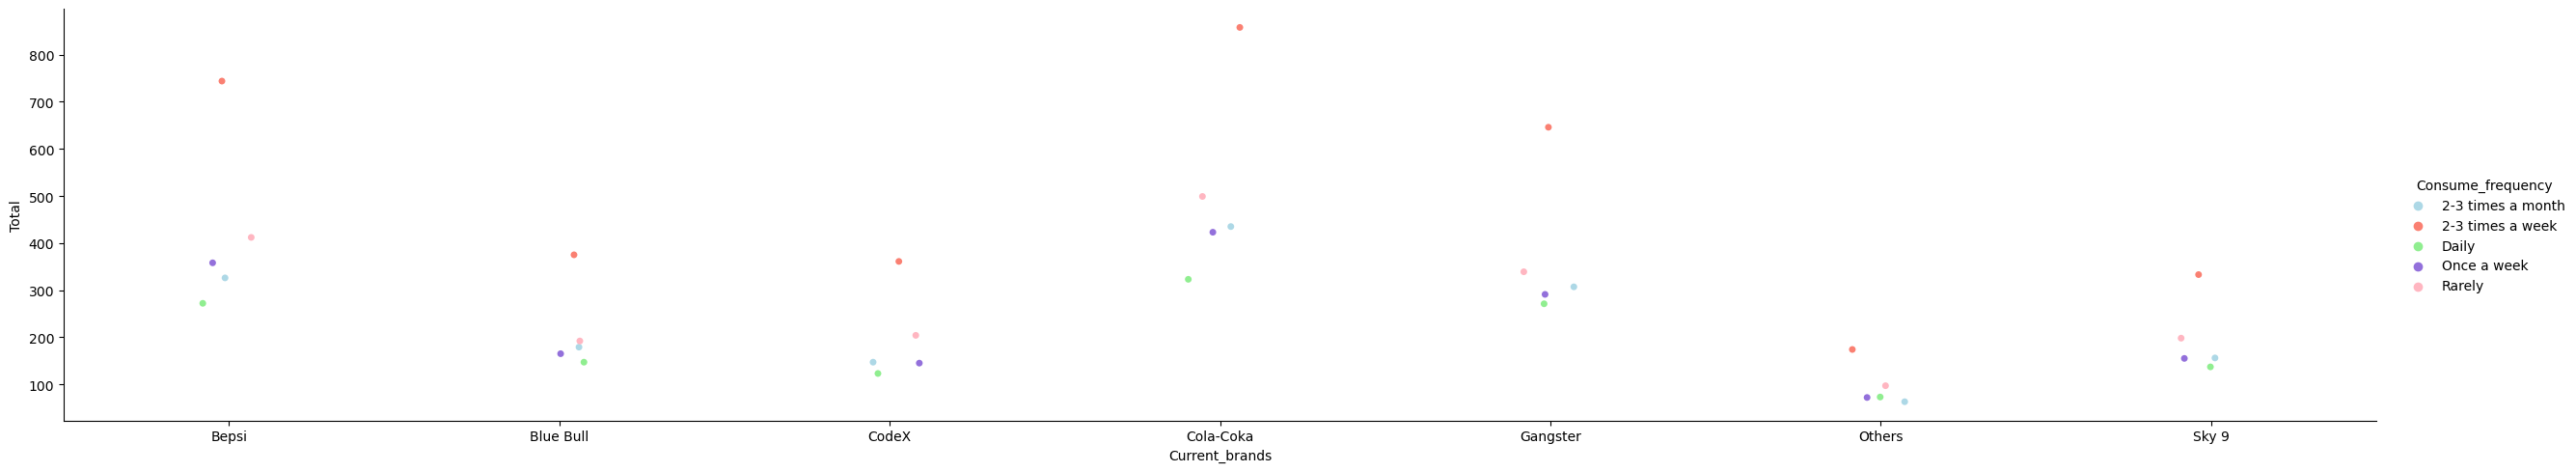

In [18]:
sns.catplot(data=consume_frequency_brands, x="Current_brands", y="Total", hue="Consume_frequency",kind='strip', palette= ['lightblue','salmon','lightgreen','mediumpurple','lightpink'], height=5, aspect=5)

In [19]:
consume_frequency_brands[consume_frequency_brands['Consume_frequency'] == '2-3 times a week'].sum()

Current_brands         BepsiBlue BullCodeXCola-CokaGangsterOthersSky 9
Consume_frequency    2-3 times a week2-3 times a week2-3 times a we...
Total                                                             3491
dtype: object

จากการ visualize แสดงให้เห็นว่าส่วนใหญ่ ผู้บริโภคมีความถี่ในการบริโภคสินค้าอยู่ที่ 2-3 ครั้งต่อสัปดาห์ โดยมีทั้งหมด 3491 คน

##### **กราฟแสดงช่วงราคาที่คนส่วนใหญ่ในเมืองนั้นๆยอมจ่าย**

In [20]:
city_price_range = df[['City', 'Price_range']].groupby(['City', 'Price_range']).size().to_frame(name='Total').reset_index()
city_price_range.head(5)

,City,Price_range,Total
0,Ahmedabad,100-150,144
1,Ahmedabad,50-99,180
2,Ahmedabad,Above 150,82
3,Ahmedabad,Below 50,50
4,Bangalore,100-150,881


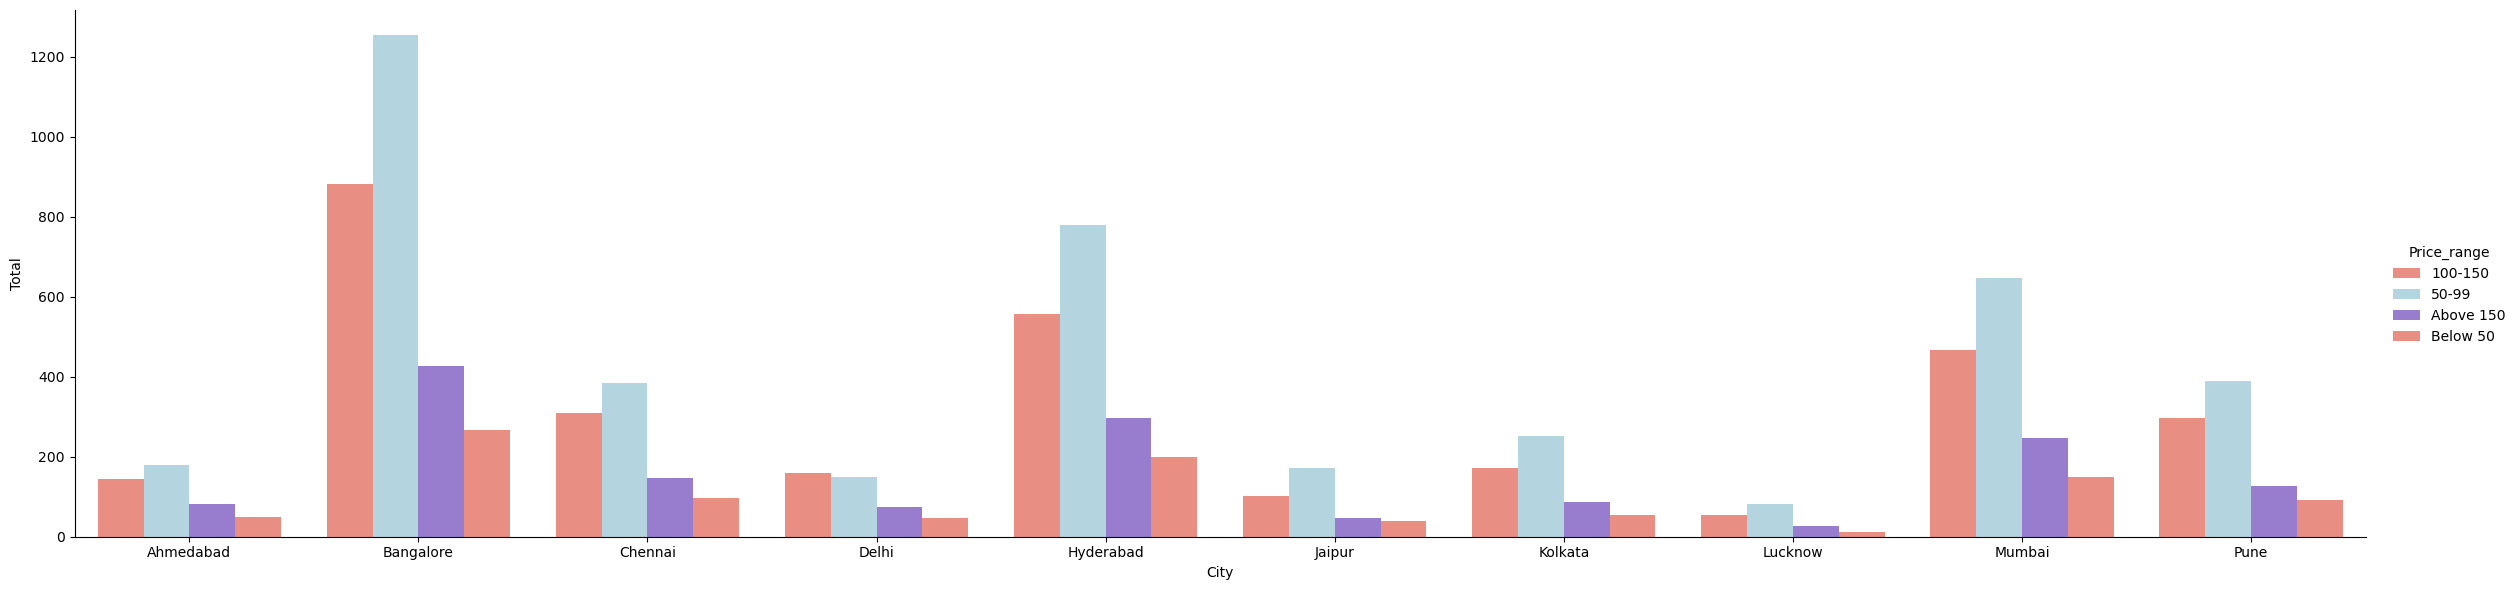

In [21]:
sns.catplot(x="City", y="Total", hue="Price_range", kind='bar', data=city_price_range, height=6, aspect=4 ,errorbar=None, palette= ['salmon','lightblue','mediumpurple'])

In [22]:
#หาช่วงราคาที่คนส่วนใหญ่ยอมจ่ายมากที่สุด
max_total_price_range = city_price_range.groupby('Price_range')['Total'].sum().idxmax()
high_price = city_price_range[city_price_range['Price_range'] == max_total_price_range]
high_price.sum()

City           AhmedabadBangaloreChennaiDelhiHyderabadJaipurK...
Price_range    50-9950-9950-9950-9950-9950-9950-9950-9950-995...
Total                                                       4288
dtype: object

จากการ Visualize พบว่าช่วงราคาที่คนส่วนใหญ่ในหลายๆเมืองยอมจ่ายคือช่วง 50-99 โดยมีจำนวนทั้งหมด 4288 คน โดยมีช่วงราคาที่ยอมจ่ายแตกต่างกันไปดังตารางต่อไปนี้

##### **ตารางแสดงช่วงราคาที่ผู้คนในแต่ละเมืองยอมจ่ายโดยเรียงจากมากไปน้อย**

In [23]:
# ชื่อเมืองทั้งหมด
cities = ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad','Jaipur	', 'Kolkata','Lucknow', 'Mumbai', 'Pune']

# วนลูปเพื่อสร้างและแสดงข้อมูลของแต่ละเมือง
for city in cities:
    # เรียงลำดับช่วงราคาที่ผู้คนยอมจ่ายโดยเรียงลำดับจากมากไปน้อย
    order_city = city_price_range[city_price_range['City'] == city]
    order_city = order_city.sort_values(by='Total', ascending=False)
    
    # แสดงข้อมูลเมืองแต่ละเมือง
    print(f"ข้อมูลเมืองและช่วงราคาที่ผู้บริโภคยอมจ่าย {city}:")
    print(order_city)
    print()  # สร้างบรรทัดว่างระหว่างเมืองแต่ละเมือง

ข้อมูลเมืองและช่วงราคาที่ผู้บริโภคยอมจ่าย Ahmedabad:
        City Price_range  Total
1  Ahmedabad       50-99    180
0  Ahmedabad     100-150    144
2  Ahmedabad   Above 150     82
3  Ahmedabad    Below 50     50

ข้อมูลเมืองและช่วงราคาที่ผู้บริโภคยอมจ่าย Bangalore:
        City Price_range  Total
5  Bangalore       50-99   1254
4  Bangalore     100-150    881
6  Bangalore   Above 150    426
7  Bangalore    Below 50    267

ข้อมูลเมืองและช่วงราคาที่ผู้บริโภคยอมจ่าย Chennai:
       City Price_range  Total
9   Chennai       50-99    384
8   Chennai     100-150    310
10  Chennai   Above 150    146
11  Chennai    Below 50     97

ข้อมูลเมืองและช่วงราคาที่ผู้บริโภคยอมจ่าย Delhi:
     City Price_range  Total
12  Delhi     100-150    159
13  Delhi       50-99    149
14  Delhi   Above 150     74
15  Delhi    Below 50     47

ข้อมูลเมืองและช่วงราคาที่ผู้บริโภคยอมจ่าย Hyderabad:
         City Price_range  Total
17  Hyderabad       50-99    780
16  Hyderabad     100-150    557
18  Hyderabad   Ab

จากในตารางจะเห็นได้ว่าผู้คนในเมืองส่วนใหญ่สามารถจ่ายสินค้าในราคาที่มากกว่า 50 ขึ้นไป

##### **กราฟแสดงคะแนนเฉลี่ยของความพึงพอใจในรสชาติของผู้บริโภคของแต่ละแบรนด์**

In [24]:
#หาค่าเฉลี่ยของความพึงพอใจในรสชาติของผู้บริโภค
score_brands = df[['Current_brands','Taste_experience']].groupby(['Current_brands']).mean().reset_index()
score_brands

,Current_brands,Taste_experience
0,Bepsi,3.275568
1,Blue Bull,3.297732
2,CodeX,3.273469
3,Cola-Coka,3.301812
4,Gangster,3.239482
5,Others,3.323591
6,Sky 9,3.295199


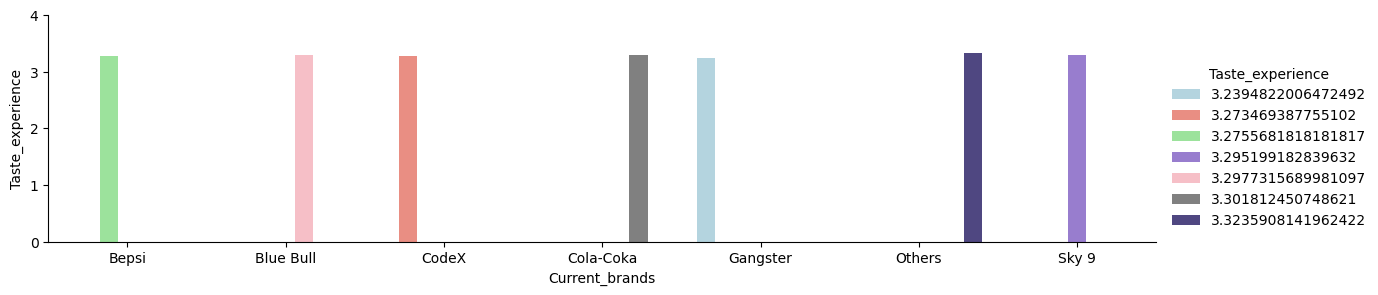

In [25]:
sns.catplot(x="Current_brands", y="Taste_experience", hue="Taste_experience", kind='bar',palette= ['lightblue','salmon','lightgreen','mediumpurple','lightpink','gray','darkslateblue'], data=score_brands, height=3, aspect=4 ,errorbar=None, estimator="mean")
plt.yticks(np.arange(0, 5, 1))
plt.show()

จากการสำรวจพบว่าทุกๆแบรนด์มีค่าเฉลี่ยที่ใกล้เคียงกัน โดยมีค่าประมาณ 3.20-3.30 คะแนน ซึ่งจะพบว่าแบรนด์ที่คะแนนรสชาติดีที่สุดนั่นคือแบรนด์อื่นๆซึ่งไม่ใช่จากที่สำรวจมา แต่หากอิงจากแบรนด์ที่สำรวจแล้วพบว่าแบรนด์ที่คะแนนรสชาติดีที่สุดนั่นคือ Cola-Coka ซึ่งมีคะแนนเฉลี่ยอยู่ที่ 3.301 คะแนน

##### **กราฟแสดงคนที่ซื้อสินค้าจากแต่ละที่**

In [26]:
#หาจำนวนคนที่ซื้อสินค้าจากแต่ละที่
location = df[['City', 'Purchase_location']].groupby(['City', 'Purchase_location']).size().to_frame(name='Total')
location

Total
City      Purchase_location              
Ahmedabad Gyms and fitness centers     62
          Local stores                 35
          Online retailers            111
          Other                        43
          Supermarkets                205
Bangalore Gyms and fitness centers    407
          Local stores                236
          Online retailers            719
          Other                       184
          Supermarkets               1282
Chennai   Gyms and fitness centers    133
          Local stores                 83
          Online retailers            246
          Other                        65
          Supermarkets                410
Delhi     Gyms and fitness centers     85
          Local stores                 27
          Online retailers            113
          Other                        28
          Supermarkets                176
Hyderabad Gyms and fitness centers    247
          Local stores                135
          Online retailers            476
          Other                       130
          Supermarkets                845
Jaipur    Gyms and fitness centers     53
          Local stores                 38
          Online retailers             87
          Other                        27
          Supermarkets                155
Kolkata   Gyms and fitness centers     87
          Local stores                 47
          Online retailers            137
          Other                        31
          Supermarkets                264
Lucknow   Gyms and fitness centers     20
          Local stores                 16
          Online retailers             39
          Other                        13
          Supermarkets                 87
Mumbai    Gyms and fitness centers    223
          Local stores                118
          Online retailers            407
          Other                        84
          Supermarkets                678
Pune      Gyms and fitness centers    147
          Local stores                 78
          Online retailers            215
          Other                        74
          Supermarkets                392

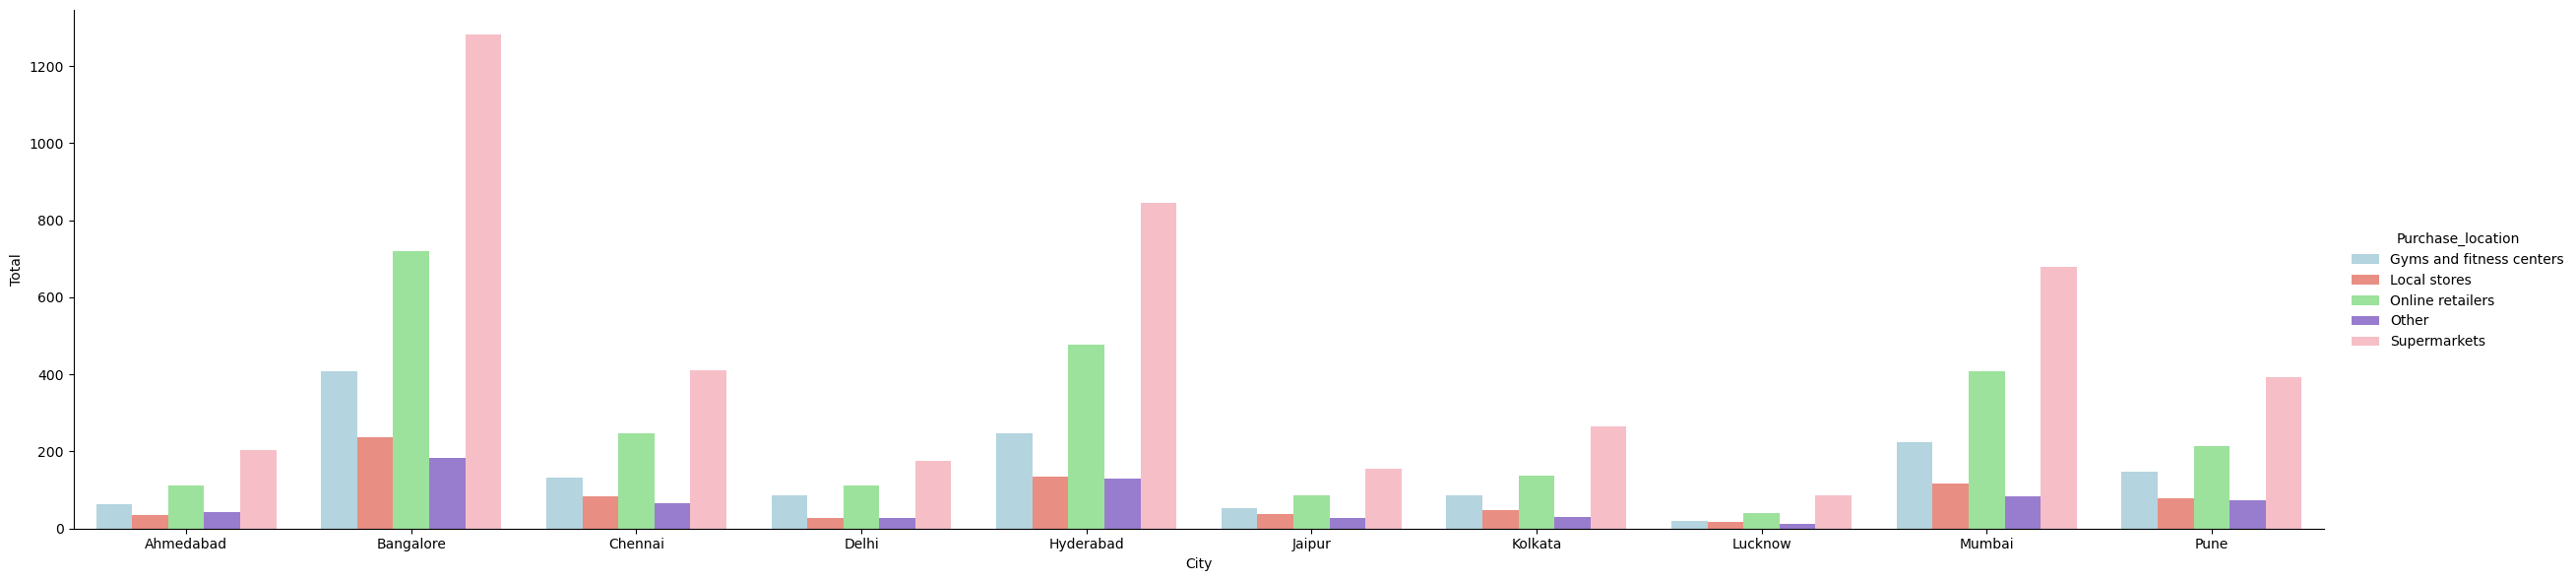

In [27]:
sns.catplot(x="City", y="Total", hue="Purchase_location", kind='bar', data=location.reset_index(), height=6, aspect=4 ,errorbar=None, palette= ['lightblue','salmon','lightgreen','mediumpurple','lightpink'])

จากการสำรวจพบว่าผู้บริโภคในทุกๆเมืองมักจะซื้อสินค้าจาก Supermarket มากที่สุดตามด้วย ช่องทางออนไลน์และทางฟิตเนสตามลำดับ

##### **classification ว่าถ้ามีลูกค้าแบบนี้จะเลือกซื้อแบรนอะไร**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [29]:
df_for_classifier = df.drop(['Name', 'City'], axis=1).apply(LabelEncoder().fit_transform)

In [30]:
# df_for_classifier = df_for_classifier.apply(LabelEncoder().fit_transform)
X = df_for_classifier.drop(['Current_brands', 'Taste_experience',  ], axis=1)

In [31]:
y = df_for_classifier['Current_brands']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
gnb = MultinomialNB()

In [34]:
gnb.fit(X_train, y_train)
gnb.score(X_train, y_train)

0.2542857142857143

##### **clustering**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [36]:
df_for_classtering = df.drop(['Name', 'City'], axis=1).apply(LabelEncoder().fit_transform)

KMeans Ckustering

In [37]:
from sklearn.cluster import KMeans

In [38]:
X = df_for_classifier.copy()

In [39]:
model = KMeans(n_clusters=3)
model.fit(X)

c:\Users\phums\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

c:\Users\phums\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'